# Importing the libraries

In [1]:
import string
from IPython.display import display

# data manipulation & vizualization libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# nltk imports
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# nltk downloads
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

# spell check library
from autocorrect import Speller
spell = Speller(lang='en')

# sklearn imports
from sklearn import svm
from sklearn import ensemble
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Reading the given dataset

* reading the given csv file using pd.read_csv
* displaying the top 3 rows to a general idea of data in the file
* displaying the shape of the data
* separating the product category column (target), description column (main feature) in another dataframe 

In [2]:
data = pd.read_csv("dataset/flipkart_com-ecommerce_sample.csv")

data.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."


In [3]:
# printing the shape of the dataframe 

print(data.shape)

(20000, 15)


In [4]:
# separating the product category column, description column in another dataframe

df = data[["product_category_tree", "description"]]

df.head(3)

,product_category_tree,description
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...


# Handling NaN values

* first printing the df.isnull().sum() to find out how many null values are there in each column 
* there are only two 2 nan in description column, so I use dropna to delete those rows

In [5]:
# sum of nan values in each column

df.isnull().sum()

product_category_tree    0
description              2
dtype: int64

In [6]:
# dropping the rows with nan values

df.dropna(inplace=True)

df.isnull().sum()

product_category_tree    0
description              0
dtype: int64

# Getting the primary category

* Separating the primary category which is first entity in product_category_tree column and making it as a new column 
* Deleting the product category tree column 

In [7]:
# separating the primary category using get_primary_category function 

def get_primary_category(product_category_tree):
    categories = product_category_tree.split(">>")
    if len(categories) == 1:
        return categories[0][2:-2].strip()
    else:
        return categories[0][2:].strip()
    
    
df["primary_category"] = df["product_category_tree"].apply(get_primary_category)

df.head(3)

,product_category_tree,description,primary_category
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Clothing
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,Footwear


In [8]:
# deleting the product category tree column 

del df["product_category_tree"]

# Plotting the primary category

* Plotting the frequency of primary_category using line plot in order of descreasing freuency
* We can observe that the data for categories after index 25 is very less, so we have to remove some categories due to lack of data

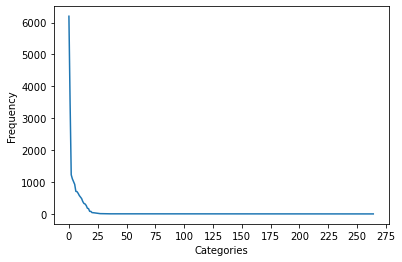

In [9]:
# plotting the count plot for primary category column

plt.plot(df["primary_category"].value_counts().values)

plt.xticks(np.arange(0, 300, 25))
plt.ylabel('Frequency')
plt.xlabel('Categories')

plt.show()

# Printing the frequency of each unique category 

* Printing the frequency of each unique category to filter the categories
* Observing that categories having frequency < 10 aren't actual categories, so have to remove them 

In [10]:
# value_counts of each primary category

categories = df["primary_category"].value_counts()

print(categories)

Clothing                                               6197
Jewellery                                              3531
Footwear                                               1227
Mobiles & Accessories                                  1099
Automotive                                             1012
                                                       ... 
Eternal Gandhi Super Series Crystal Paper Weight...       1
FIFO Bottom Women's  Combo                                1
Naaz 2 in 1 Paper Quilling Board Game                     1
Zevrr Sterling Silver Swarovski Zirconia Platinu...       1
SHOPOJ Purple Paper Sky Lantern (80 cm X 34 cm, ...       1
Name: primary_category, Length: 265, dtype: int64


# Removing the least frequent categories 

* if the frequency of category is < 10, replacing with np.nan 
* dropping all nan values from the dataframe
* printing the shape of dataframe after

In [11]:
# if the frequency of category is < 10, replacing with np.nan using get_main_primary_categories function

def get_main_primary_categories(category):
    if categories[category] >= 10:
        return category
    else:
        return np.nan

df["primary_category"] = df["primary_category"].apply(get_main_primary_categories)

df.head(3)

,description,primary_category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear


In [12]:
# dropping all rows with nan values

df.dropna(inplace = True)

In [13]:
# printing shape of dataframe after, observing that we didn't lose a lot of data

print(df.shape)

(19666, 2)


# Counting & Plotting the final categories

* counting the no of final unique categories 
* plotting the count plot for the final categories
* printing the final frequencies of categories using value_counts()

In [14]:
# counting the no of final unique categories

print(len(df["primary_category"].unique()))

28


C:\Users\kusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


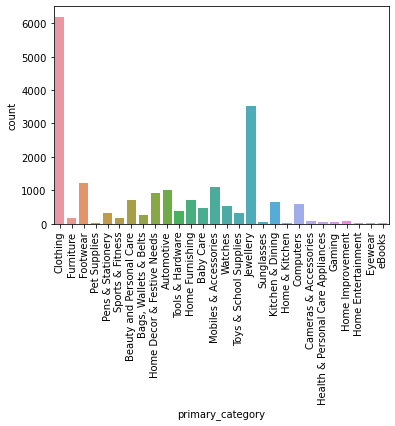

In [15]:
# plotting the count plot for the final cateories

sns.countplot(df["primary_category"])

plt.xticks(rotation = 90)

plt.show()

In [16]:
# printing the final frequencies of categories using value_counts()

final_categories = df["primary_category"].value_counts()

print(final_categories)

Clothing                             6197
Jewellery                            3531
Footwear                             1227
Mobiles & Accessories                1099
Automotive                           1012
Home Decor & Festive Needs            929
Beauty and Personal Care              710
Home Furnishing                       699
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             483
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Health & Personal Care Appliances      43
Sunglasses                             40
Gaming                                 35
Pet Supplies                      

# Writing the final categories to a file

* writing the final categories for further use 

In [17]:
# with open('final_categories.txt', 'w') as file:
#     for category in df["primary_category"]:
#         file.write(category + '\n')

# Description Cleaning and Preprocessing 

* plotting the no of characters in each row of description 
* plotting the no of words in each row of description 
* plotting the avg word length in each row of description 
* all these plots help us understand our data better

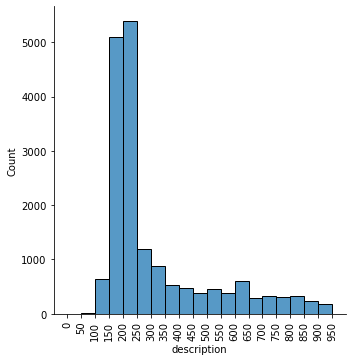

In [18]:
# plotting the no of characters in each row of description

bins = np.arange(0, 1000, 50)
sns.displot(df["description"].str.len(), bins=bins)
plt.xticks(bins, rotation=90)
plt.show()

# no of characters present in each description lies between 100 and 950 and mostly falls between 100 and 350

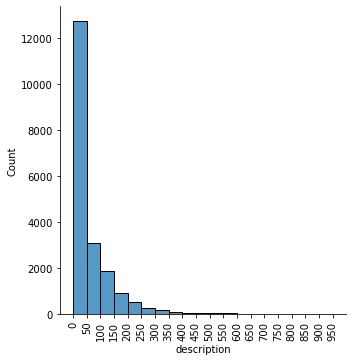

In [19]:
# plotting the no of words in each row of description

bins = np.arange(0, 1000, 50)
sns.displot(df["description"].str.split().apply(lambda x: len(x)), bins=bins)
plt.xticks(bins, rotation=90)
plt.show()

# no of words present in each description lies between 0 and 400 and mostly falls between 0 and 150

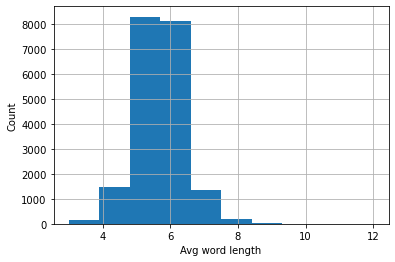

In [60]:
# plotting the avg word length in each row of description

df['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.xlabel('Avg word length')
plt.ylabel('Count')
plt.show()

# average word length in each description lies between 4 to 6 
# The graph is left skewed due to the no of stopwords in description 
# Analyzing the amount and the types of stopwords can give us some good insights into the data

# Analyzing the stopwords in description 

* downloading the stopwords from nltk
* analysing the no of stopwords by plotting the graph of most frequent stopwords
* it is essential to analyse the stopwords, because they can produce noise in our models later

In [21]:
# downloading the stopwords from nltk

stops = set(stopwords.words('english'))

print(stops)

{'o', 'below', "couldn't", 'why', 'hadn', 'should', 'as', 'don', "don't", "wasn't", 'between', 'or', 'are', "should've", 'because', 'until', "you'll", "won't", 'during', 'ain', 'own', 'have', 'him', 'down', 're', 'd', 'me', 'what', "isn't", 'too', 'your', 'for', 'where', 'myself', 'm', "it's", 'yourselves', 'ourselves', "didn't", 'up', 'theirs', 'about', 'who', 'above', 'those', 'off', 'mustn', 'its', 'other', 'most', 'had', 'if', 'whom', 'again', 'our', 'does', 'll', 'be', 'shouldn', 'how', 'more', 'needn', 't', 'hasn', 'both', 'i', 'but', 'here', 'having', 'doesn', "shan't", "weren't", 'themselves', 'been', 'then', 'wasn', 'yours', "that'll", 'hers', 'can', "wouldn't", 'she', 'from', 'didn', 'has', 'through', 'were', 'in', 'y', 'this', 'weren', "hasn't", 'on', 'before', 'same', 'they', 'them', 'won', 'which', 'all', "mightn't", 'himself', 's', 'now', 'her', "aren't", "she's", 'itself', 'into', 'no', 'do', "shouldn't", 'am', "doesn't", "haven't", 'there', 'their', 'a', 'over', 'and', 

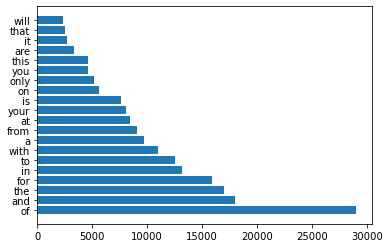

In [22]:
# analysing the no of stopwords by plotting the graph of most frequent stopwords

corpus = []

new = df['description'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stops:
        dic[word] += 1
        
top_stopwords = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:20] 
x, y = zip(*top_stopwords)
plt.barh(x, y)
plt.show()

# we can can clearly see that stopwords such as ('of', 'and', 'the', ..) appear very frequently in the desription column

# Most common words (not stopwords)

* finding and plotting the most common words which appear in our data apart from stopwords
* this can help us gain insight on what type of words dominate our dataset

<AxesSubplot:>

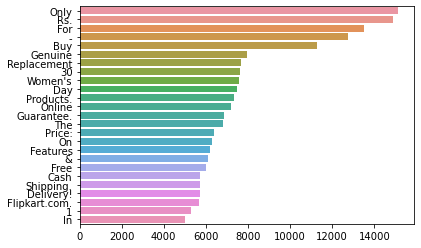

In [23]:
# apart from stopwords, we need to find the words which appear the most in the description 

from collections import Counter
counter = Counter(corpus)
most_comm = counter.most_common()

x, y= [], []
for word, count in most_comm[:40]:
    if word not in stops:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y, y=x)

# we can clearly see that we have some top stopwords in other cases also, and words such as ('Genuine', 'Women's', 
# 'Replacement') occur very frequently

# Ngram & Trigram exploration

* Looking at most frequent n-grams can give you a better understanding of the context

<AxesSubplot:>

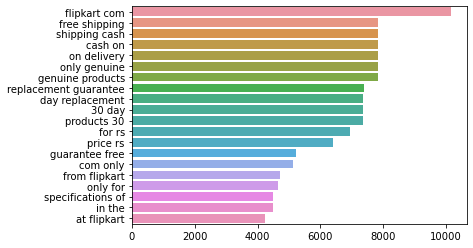

In [24]:
# finding and plotting the most frequent bi-grams

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_n_bigrams = get_top_ngrams(df["description"], 2)[:20] 
x, y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x=y, y=x)

# we can see some top bigrams contain phrases such as free shipping, flipkart com, cash on, only genuine etc
# which seem to be generic and not useful to classify products into their categories

<AxesSubplot:>

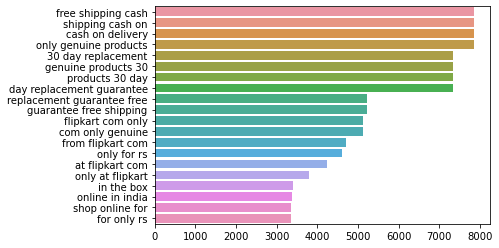

In [25]:
# finding and plotting the most frequent tri-grams

top_tri_grams = get_top_ngrams(df["description"], n=3)
x,y = map(list, zip(*top_tri_grams))
sns.barplot(x=y, y=x)

# top trigrams too show the same behaviour of generic terms appearing frequently

# Analyzing the description column using NER

* loading nlp from spacy 
* making a string from first five rows of description column 
* visualizing the entities using displacy function 

In [39]:
all_words_string = ' '.join([w for row in df["description"].loc[:5] for w in row.split() ]) 
doc = nlp(all_words_string)

[(x.text,x.label_) for x in doc.ents]

displacy.render(doc, style='ent')

In [40]:
def ner(text):
    doc = nlp(text)
    return [x.label_ for x in doc.ents]

# ent = df['description'].apply(lambda x : ner(x))
# ent = [x for sub in ent for x in sub]

# counter = Counter(ent)
# count = counter.most_common()

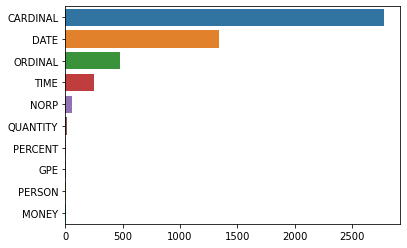

In [61]:
x, y = map(list,zip(*count))
sns.barplot(x=y, y=x)
plt.savefig('assets/ner_freq.png', dpi=100)

# ner_freq = plt.imread('assets/ner_freq.png')
# plt.imshow(ner_freq)
# plt.axis('off')
# plt.show()

# Updating the stopwords 

* looking the most common words, bi-grams, tri-grams gave me insight to find out words which are not relevant to predicting
categories
* updating the stopwords by my_stops (manually chosen stopwords)
* upadting the stopwords by punctuation marks

In [26]:
my_stops = ['flipkart', 'com', 'shipping', 'cash', 'buy', 'products', 'online', 'shop', 'cash', 'delivery', 'free', 
           'genuine', 'replacement', '30', 'day', 'guarantee', 'rs', 'box', 'key', 'features', 'india', 'flipkart.com', 
            'details', 'specification', 'warranty', 'sale', 'purchase']

stops.update(my_stops)
stops.update(string.punctuation)

print(stops)

{'o', 'warranty', '&', 'below', "couldn't", '+', 'why', 'online', 'hadn', 'should', 'as', '|', 'don', "don't", "wasn't", 'between', 'or', 'are', "should've", 'because', 'until', 'flipkart', "you'll", "won't", 'during', 'buy', '$', 'ain', 'own', 'have', '{', 'him', 'down', 're', 'd', 'me', '?', 'what', 'guarantee', 'sale', "isn't", 'too', 'your', 'purchase', 'for', 'where', 'myself', 'm', "it's", 'yourselves', 'ourselves', "didn't", '30', '-', '>', 'up', 'theirs', '#', 'about', 'who', 'above', 'those', 'off', 'mustn', ']', 'its', 'other', 'most', 'had', 'if', 'rs', 'whom', 'again', 'features', '}', 'our', 'does', 'll', 'be', 'shouldn', 'day', '@', 'how', '"', 'more', '*', 'needn', 't', 'hasn', 'both', 'i', 'but', 'here', 'having', 'doesn', "shan't", "weren't", 'themselves', 'been', 'then', 'wasn', 'yours', 'specification', "that'll", 'shop', 'hers', 'can', "wouldn't", 'key', 'she', 'from', 'didn', 'has', 'through', 'were', 'in', '\\', 'y', 'this', 'weren', "hasn't", 'on', 'before', 'sam

# Description Cleaning 

* remoing the stopwords from the description 
* removing the numbers from the list of words using isalpha()
* reducing the words to its root form using WordNetLemmatizer (play, playing, played aren't different words)
* spell check the word also before putting it in the description 
* appending the cleaned words to the corpus                                                         

In [27]:
# function to get a simple pos (part of speech) tag for wordnetlemmatizer

def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [28]:
# preprocess descrption function to clean the description and create a corpus of clean words

def clean_description(df):
    corpus = []
    stem = PorterStemmer()
    lemma = WordNetLemmatizer()
    for desc in df["description"]:
        words = [w.lower() for w in word_tokenize(desc) if (w.lower() not in stops and w.isalpha() == True)]
        clean_words = []
        for w in words:
            if len(w) > 2:
                pos = nltk.pos_tag([w])
#                 clean_words.append(lemma.lemmatize(w, pos = get_simple_pos(pos[0][1])))
                clean_words.append(spell(lemma.lemmatize(w, pos = get_simple_pos(pos[0][1]))))
        corpus.append(clean_words)
    return corpus

# to run the clean_description function 
# corpus = clean_description(df)
# print(len(corpus))

# Writing & Reading the corpus to/from a file

* so that we don't need to preprocess the data again and can just read from the file

In [29]:
# saving the clean corpus for future use

# with open('corpus-spell.txt', 'w', encoding="utf-8") as file:
#     for row in corpus:
#         file.write(' '.join(row) + '\n')

In [30]:
# reading the data from pre-saved clean corpus file 

with open("clean-dataset/corpus.txt", 'r', encoding='utf-8') as file:
    data = list(file.readlines())

corpus= [] 
for i in data:
    corpus.append(i.split())

df["description"] = data
df.head(3)

,description,primary_category
0,alisha solid woman cycling short cotton lycra ...,Clothing
1,fabhomedecor fabric double sofa bed finish col...,Furniture
2,belly sandal wedge heel casuals belly price ma...,Footwear


In [30]:
# import gensim

# dic = gensim.corpora.Dictionary(corpus)
# bow_corpus = [dic.doc2bow(doc) for doc in corpus]

C:\Users\kusha\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [31]:
# lda_model = gensim.models.LdaMulticore(bow_corpus, 
#                                    num_topics = 4, 
#                                    id2word = dic,                                    
#                                    passes = 10,
#                                    workers = 2)
# lda_model.show_topics()

[(0,
  '0.039*"woman" + 0.022*"men" + 0.019*"fabric" + 0.019*"casual" + 0.019*"brand" + 0.018*"print" + 0.018*"cotton" + 0.017*"collection" + 0.016*"solid" + 0.015*"apparel"'),
 (1,
  '0.022*"cover" + 0.018*"design" + 0.017*"necklace" + 0.016*"alloy" + 0.016*"price" + 0.012*"quality" + 0.012*"one" + 0.011*"add" + 0.010*"back" + 0.010*"set"'),
 (2,
  '0.013*"material" + 0.012*"color" + 0.010*"type" + 0.010*"inch" + 0.009*"price" + 0.009*"product" + 0.009*"cover" + 0.008*"specification" + 0.008*"general" + 0.007*"size"'),
 (3,
  '0.024*"gold" + 0.021*"diamond" + 0.016*"ring" + 0.014*"set" + 0.013*"yellow" + 0.013*"silver" + 0.012*"color" + 0.012*"type" + 0.011*"price" + 0.010*"model"')]

# Wordcloud to display the most common words 

* display the most common words in our clean description using wordcloud in a nice fashion 
* easier to visualize

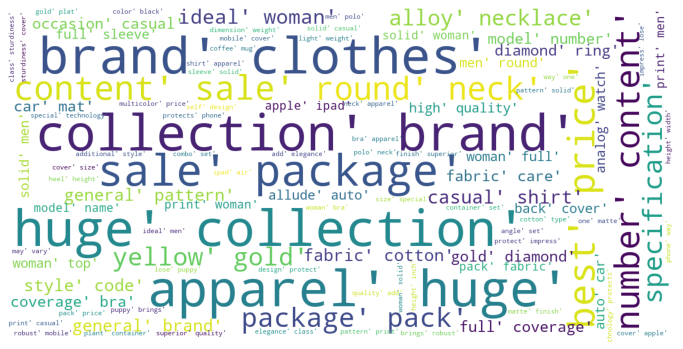

In [34]:
# display the most common words in our clean description using wordcloud

from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stops,
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        normalize_plurals = True,
        random_state=1)
   
    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

# Building models and predicting categories

## For Machine Learning models implementation, refer this notebook

### [ML Models Implementation](./ML-Models-Implementation.ipynb)

* Separate notebook for ease of implementation. 

# Machine Learning Models Results 

* The results were recorded in a excel file and now reading it into a dataframe
* sorting df_results by Test Accuracy
* Visualizing the Test, Training and Cross Validation Mean Accuracy

In [64]:
df_results = pd.read_excel('models-accuracy.xlsx')

df_results = df_results.sort_values(by=["Test Accuracy"], ascending = False)

display(df_results)

,Model Name,Test Accuracy,Training Accuracy,Mean Cross Validation Accuracy
10,Xgboost Classifier (Count Vectorizer),0.974581,0.997712,0.930896
11,Xgboost Classifier (Count Vectorizer + TfidfTr...,0.971276,0.998792,0.928252
4,Random Forest Classifier (Count Vectorizer),0.969497,0.999555,0.918439
5,Random Forest Classifier (TF-IDF Vectorizer),0.968226,0.999555,0.917727
3,SVM (TF-IDF Vectorizer),0.965938,0.995169,0.923879
0,Multinomial Naive Bayes (Count Vectorizer),0.960092,0.987605,0.920269
8,Gradient Boosting Classifier (Count Vectorizer),0.959075,0.998856,0.903183
1,Multinomial Naive Bayes (TF-IDF Vectorizer),0.957804,0.992245,0.920218
9,Gradient Boosting Classifier (Count Vectorizer...,0.957295,0.998729,0.908014
2,SVM (Count Vectorizer),0.935689,0.978960,0.863674


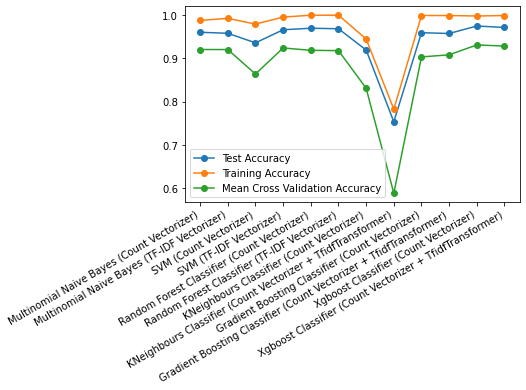

In [67]:
df_results = pd.read_excel('models-accuracy.xlsx')

fig, ax = plt.subplots()

ax.plot(df_results['Model Name'], df_results['Test Accuracy'], label='Test Accuracy', marker='o')
ax.plot(df_results['Model Name'], df_results['Training Accuracy'], label='Training Accuracy', marker='o')
ax.plot(df_results['Model Name'], df_results['Mean Cross Validation Accuracy'], 
        label='Mean Cross Validation Accuracy', marker='o')


plt.legend()
fig.autofmt_xdate()
plt.show()

## For Deep Neural Networks implementation, refer this notebook

### [Deep Learning Approach](./Deep-Learning-Approach.ipynb)

* Separate notebook for ease of implementation. 

# Overall Results Visualization 

# Final Conclusion 